# 전략 볼린저 밴드 이용 추세추종 기법 (심화버전 MFI)

매수 : 주가 상단 밴드 접근, 지표 강세를 확증할 때 매수  
%b > 0.8 and MFI > 80  
매도 : 주가 하단 밴드 접근, 지표 약세를 확증할 때 매도  
%b < 0.2 and MFI < 20   

#### test data 삼성전자

In [7]:
import time
from tqdm import tqdm

In [14]:
import pandas as pd 
df_raw = pd.read_csv('C:/Users/mi-bi/OneDrive/바탕 화면/data Row/mom.csv', index_col=0)

In [15]:
df_raw = df_raw.drop(df_raw.iloc[:,8:],axis=1)

#### 전종목 볼린저밴드만들기

In [28]:
def make_bolinger_band(df):
    object_list = df['종목명'].unique()
    for i in tqdm(object_list):
        time.sleep(0.1)
        idx = df[df['종목명']==i].index
        df.loc[idx[0]:idx[-1],'MA20'] = df.loc[idx[0]:idx[-1],'종가'].rolling(window=20).mean()
        df.loc[idx[0]:idx[-1],'stddev'] = df.loc[idx[0]:idx[-1],'종가'].rolling(window=20).std()
    df['upper'] = df['MA20'] + (df['stddev'] * 2)   
    df['lower'] = df['MA20'] - (df['stddev'] * 2)
    df['PB'] = (df['종가'] - df['lower']) / (df['upper'] - df['lower'])
    df['bandwidth'] = (df['upper'] - df['lower']) / df['MA20'] * 100
    return df


In [29]:
df_bol = make_bolinger_band(df_raw)

100%|██████████| 2436/2436 [09:30<00:00,  4.27it/s]


In [31]:
df_bol.to_csv('bolinger.csv')

#### 시각화를 통한 검증

In [43]:
name = '삼성전자'
df_test = df_bol[df_bol['종목명']==name]

In [32]:
import matplotlib.pyplot as plt

c:\Users\mi-bi\anaconda3\envs\kis_pjt\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mi-bi\anaconda3\envs\kis_pjt\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mi-bi\anaconda3\envs\kis_pjt\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mi-bi\anaconda3\envs\kis_pjt\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


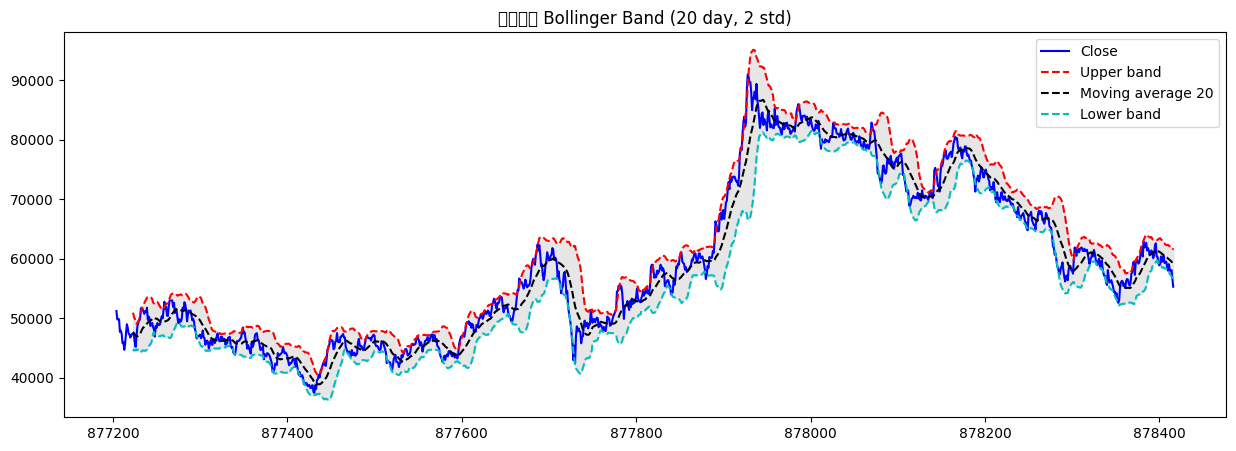

In [46]:
plt.figure(figsize=(15, 5))
plt.plot(df_test.index, df_test['종가'], color='#0000ff', label='Close')    # ⑥
plt.plot(df_test.index, df_test['upper'], 'r--', label = 'Upper band')       # ⑦
plt.plot(df_test.index, df_test['MA20'], 'k--', label='Moving average 20')
plt.plot(df_test.index, df_test['lower'], 'c--', label = 'Lower band')
plt.fill_between(df_test.index, df_test['upper'], df_test['lower'], color='0.9')  # ⑧ 
plt.legend(loc='best')
plt.title(f'{name} Bollinger Band (20 day, 2 std)')
plt.show()

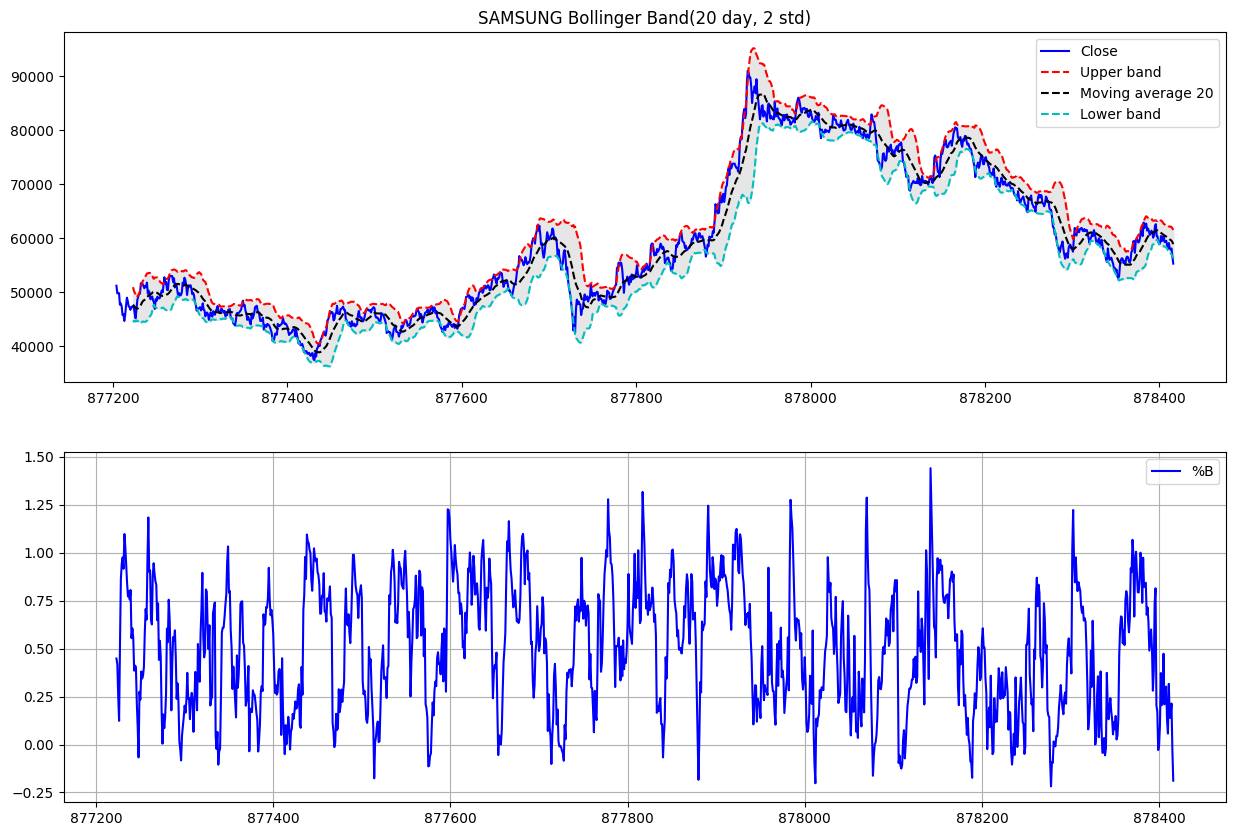

In [42]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)  # ②
plt.plot(df_test.index, df_test['종가'], color='#0000ff', label='Close')
plt.plot(df_test.index, df_test['upper'], 'r--', label = 'Upper band')
plt.plot(df_test.index, df_test['MA20'], 'k--', label='Moving average 20')
plt.plot(df_test.index, df_test['lower'], 'c--', label = 'Lower band')
plt.fill_between(df_test.index, df_test['upper'], df_test['lower'], color='0.9')
plt.title('SAMSUNG Bollinger Band(20 day, 2 std)')
plt.legend(loc='best')

plt.subplot(2, 1, 2)  # ③
plt.plot(df_test.index, df_test['PB'], color='b', label='%B')  # ④
plt.grid(True)
plt.legend(loc='best')
plt.show()

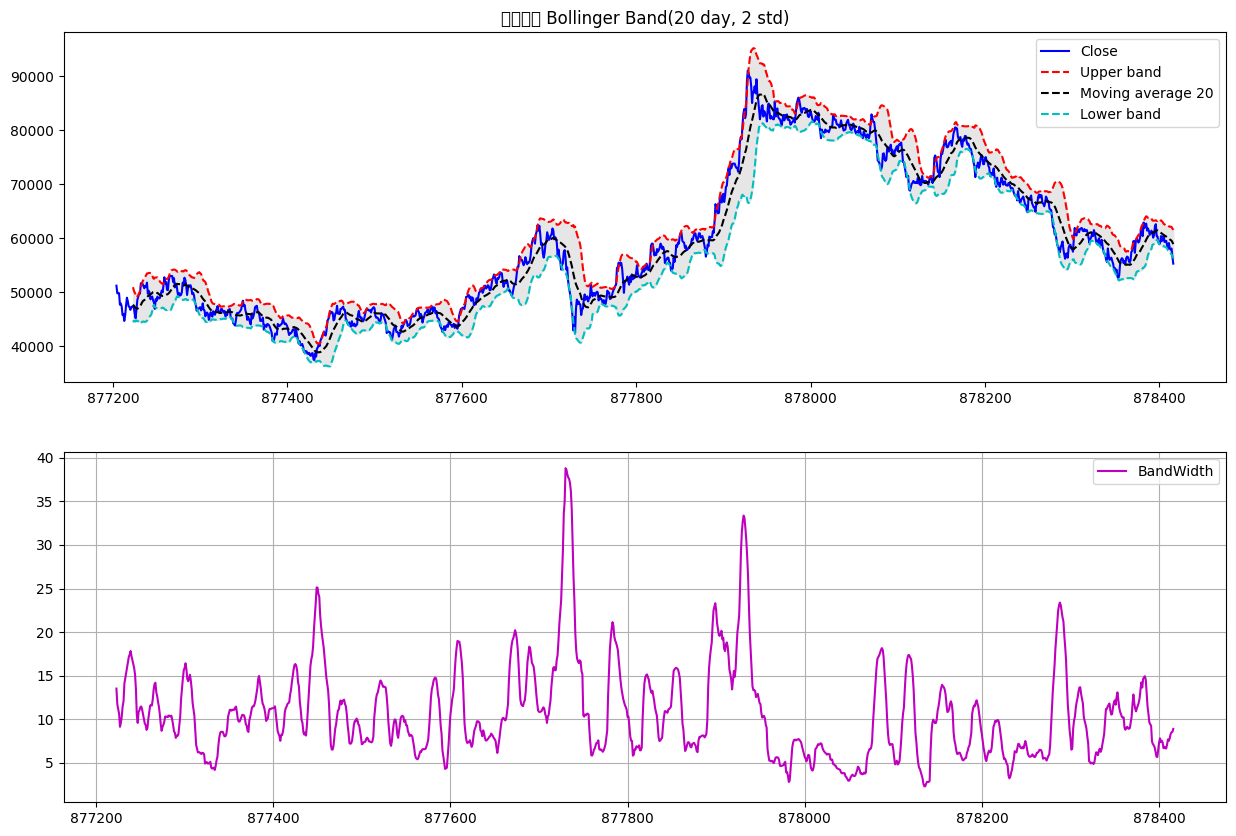

In [48]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(df_test.index, df_test['종가'], color='#0000ff', label='Close')
plt.plot(df_test.index, df_test['upper'], 'r--', label ='Upper band')
plt.plot(df_test.index, df_test['MA20'], 'k--', label='Moving average 20')
plt.plot(df_test.index, df_test['lower'], 'c--', label ='Lower band')
plt.fill_between(df_test.index, df_test['upper'], df_test['lower'], color='0.9')
plt.title(f'{name} Bollinger Band(20 day, 2 std)')
plt.legend(loc='best')
plt.subplot(2, 1, 2)
plt.plot(df_test.index, df_test['bandwidth'], color='m', label='BandWidth') # ②
plt.grid(True)
plt.legend(loc='best')
plt.show()

#### MFI 는 미래데이터 이용하는데, 검증이필요함  
i+1 과 비교하긴하지만 3월7일 3월8일에서 3월8일 종가를 받는다->  3월 7일에 MFI 가 완성된다.  
3월 7일의 MFI 가 조건에 맞으면 투자 하면 되는것 아닌가??  
전일 MFI <

In [ ]:
def make_mfi(df):
    df['PB'] = (df['종가'] - df['lower']) / (df['upper'] - df['lower'])
    df['TP'] = (df['최고가'] + df['최저가'] + df['종가']) / 3
    df['PMF'] = 0
    df['NMF'] = 0
    object_list = df['종목명'].unique()
    for i in tqdm(object_list):
        time.sleep(0.1)
        idx = df[df['종목명']==i].index
        for i in idx:
            if df.TP.values[i] < df.TP.values[i+1]:
                df.PMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
                df.NMF.values[i+1] = 0
            else:
                df.NMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
                df.PMF.values[i+1] = 0
            df.loc[idx[0]:idx[-1],'MFR'] = (df.loc[idx[0]:idx[-1],'PMF'].rolling(window=10).sum() /df.loc[idx[0]:idx[-1],'MMF'].rolling(window=10).sum())
        df['MFI10'] = 100 - 100 / (1 + df['MFR'])




#### 반전매매 기법 일중강도

In [2]:
import pandas as pd 
df_bol = pd.read_csv('C:/Users/mi-bi/OneDrive/바탕 화면/data Row/bolinger.csv', index_col=0)

In [3]:
df_bol

,날짜,종가,시가,최고가,최저가,누적거래량,누적거래대금,종목명,MA20,stddev,upper,lower,PB,bandwidth
0,2022-12-22,10650,9980,11700,9930,28856232,309808795730,바이오노트,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-12-23,10150,10600,11200,10100,8180753,86595242100,바이오노트,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-12-26,9720,10550,10700,9650,4479667,45206813740,바이오노트,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-12-27,9360,9770,9880,9130,4101930,38365054640,바이오노트,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-12-28,8870,9390,9420,8700,3177379,28837782380,바이오노트,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621629,2022-12-23,3765,3900,3900,3765,33477,127543190,모헨즈,3998.00,136.886430,4271.772860,3724.227140,0.074465,13.695491
2621630,2022-12-26,3720,3765,3765,3610,30218,111265525,모헨즈,3988.25,149.475178,4287.200357,3689.299643,0.051347,14.991556
2621631,2022-12-27,3755,3700,3755,3665,17856,66261900,모헨즈,3973.00,157.132194,4287.264388,3658.735612,0.153158,15.820004
2621632,2022-12-28,3630,3770,3775,3615,25279,93477675,모헨즈,3948.25,170.357789,4288.965578,3607.534422,0.032968,17.259068


In [4]:
def make_intra_inten(df):
    df['II'] = (2*df['종가']-df['최고가']-df['최저가'])/(df['최고가']-df['최저가'])*df['누적거래량'] 
    object_list = df['종목명'].unique()
    for i in tqdm(object_list):
        time.sleep(0.1)
        idx = df[df['종목명']==i].index
        df.loc[idx[0]:idx[-1],'IIP21']= df.loc[idx[0]:idx[-1],'II'].rolling(window=21).sum()/df.loc[idx[0]:idx[-1],'누적거래량'].rolling(window=21).sum()*100  # ②
    return df


In [ ]:
def make_bolinger_band(df):
    object_list = df['종목명'].unique()
    for i in tqdm(object_list):
        time.sleep(0.1)
        idx = df[df['종목명']==i].index
        df.loc[idx[0]:idx[-1],'MA20'] = df.loc[idx[0]:idx[-1],'종가'].rolling(window=20).mean()
        df.loc[idx[0]:idx[-1],'stddev'] = df.loc[idx[0]:idx[-1],'종가'].rolling(window=20).std()
    df['upper'] = df['MA20'] + (df['stddev'] * 2)   
    df['lower'] = df['MA20'] - (df['stddev'] * 2)
    df['PB'] = (df['종가'] - df['lower']) / (df['upper'] - df['lower'])
    df['bandwidth'] = (df['upper'] - df['lower']) / df['MA20'] * 100
    return df

In [8]:
df_result = make_intra_inten(df_bol)

100%|██████████| 2436/2436 [09:55<00:00,  4.09it/s]


In [10]:
def make_signal_bol(df):
    df['buy'] = (df['PB']<0.05)&(df['IIP21']>0)
    df['sell'] = (df['PB']>0.95)&(df['IIP21']<0)
    return df

In [11]:
df_signal = make_signal_bol(df_result)

In [15]:
df_signal['buy'].value_counts()

False    2581457
True       40177
Name: buy, dtype: int64

In [16]:
df_signal['sell'].value_counts()

False    2556388
True       65246
Name: sell, dtype: int64

In [17]:
df_signal.isnull().sum()

날짜                0
종가                0
시가                0
최고가               0
최저가               0
누적거래량             0
누적거래대금            0
종목명               0
MA20          46188
stddev        46188
upper         46188
lower         46188
PB           103249
bandwidth     46188
II            74708
IIP21        160010
buy               0
sell              0
dtype: int64

#### BackTest

In [19]:
df_test = df_signal[df_signal['종목명']=='삼성전자']

c:\Users\mi-bi\anaconda3\envs\kis_pjt\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mi-bi\anaconda3\envs\kis_pjt\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


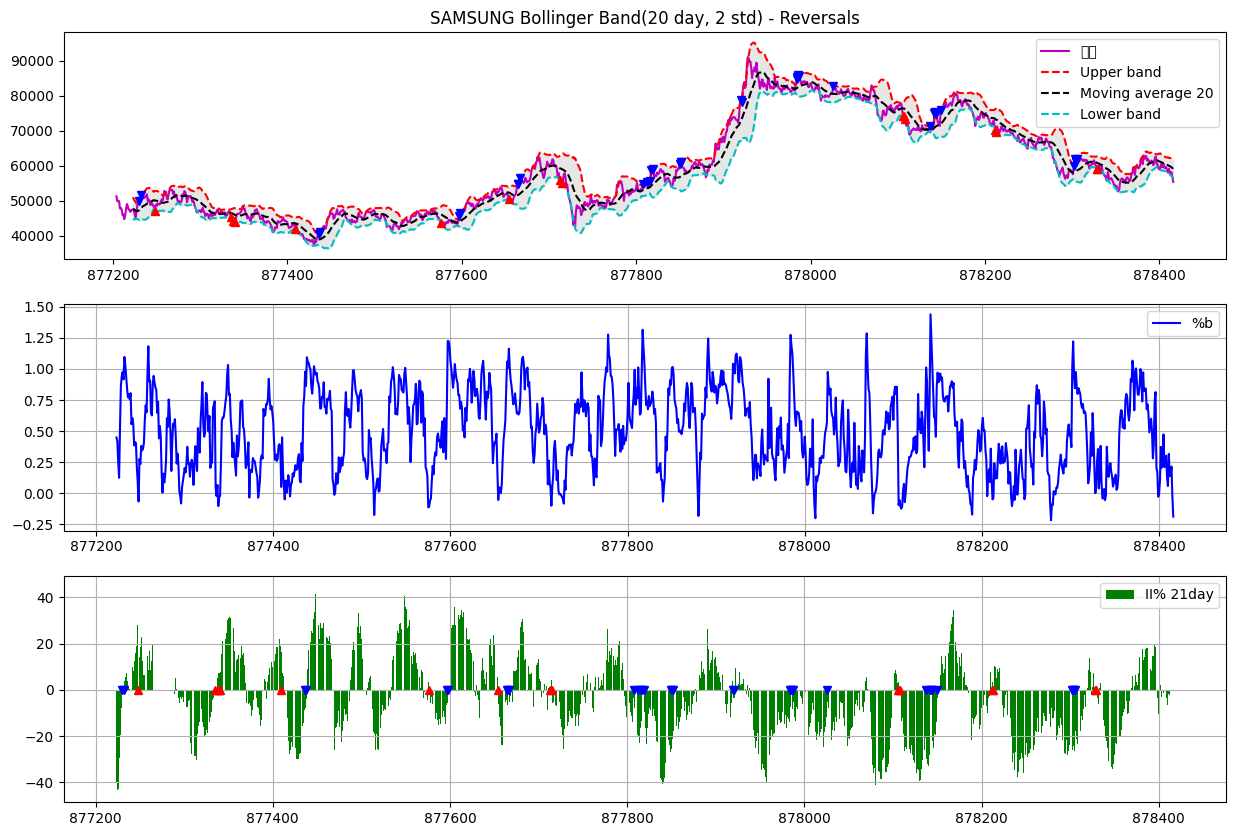

In [23]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
plt.title('SAMSUNG Bollinger Band(20 day, 2 std) - Reversals')
plt.plot(df_test.index, df_test['종가'], 'm', label='종가')
plt.plot(df_test.index, df_test['upper'], 'r--', label ='Upper band')
plt.plot(df_test.index, df_test['MA20'], 'k--', label='Moving average 20')
plt.plot(df_test.index, df_test['lower'], 'c--', label ='Lower band')
plt.fill_between(df_test.index, df_test['upper'], df_test['lower'], color='0.9')
for i in range(0, len(df_test.종가)):
    if df_test.PB.values[i] < 0.05 and df_test.IIP21.values[i] > 0:       # ①
        plt.plot(df_test.index.values[i], df_test.종가.values[i], 'r^')  # ②
    elif df_test.PB.values[i] > 0.95 and df_test.IIP21.values[i] < 0:     # ③
        plt.plot(df_test.index.values[i], df_test.종가.values[i], 'bv')  # ④
plt.legend(loc='best')

plt.subplot(3, 1, 2)
plt.plot(df_test.index, df_test['PB'], 'b', label='%b')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(3, 1, 3)
plt.bar(df_test.index, df_test['IIP21'], color='g', label='II% 21day')
for i in range(0, len(df_test.종가)):
    if df_test.PB.values[i] < 0.05 and df_test.IIP21.values[i] > 0:
        plt.plot(df_test.index.values[i], 0, 'r^') # ⑤
    elif df_test.PB.values[i] > 0.95 and df_test.IIP21.values[i] < 0:
        plt.plot(df_test.index.values[i], 0, 'bv') # ⑥
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [25]:
code_kospi = pd.read_csv('C:/Users/mi-bi/OneDrive/바탕 화면/Pjt/Kis_Api_test/SRC/current_kospi_codes.csv')
code_kosdaq = pd.read_csv('C:/Users/mi-bi/OneDrive/바탕 화면/Pjt/Kis_Api_test/SRC/current_kosdaq_codes.csv')
code = pd.concat([code_kospi,code_kosdaq])
code.rename(columns={'회사명':'종목명'},inplace=True)
code['종목코드'] = code['종목코드'].astype('str')

In [27]:
df_signal = df_signal.merge(code,on='종목명',how='inner')
df_signal.rename(columns={'종목코드':'코드'},inplace=True)
df_signal['구매수량']=1

In [24]:
import sys
sys.path.append('C:/Users/mi-bi/OneDrive/바탕 화면/Pjt/Kis_Api_test')
from BackTesting_System.backtesting import BackTesting, Utils

In [30]:
bt = BackTesting()
ut = Utils()
bt

In [31]:
bt.MONEY = 10000000

In [32]:
bt.buy_sell(df=df_signal,buy='buy',sell='sell')

In [33]:
bt.update_information()

In [34]:
bt.JOUNAL

,날짜,종목코드,체결단가,체결수량,매매비용,매매구분
0,2018-02-28,226320,56700,1,80.0,매수
1,2018-02-28,039130,100126,1,141.0,매수
2,2018-02-28,138040,15700,1,22.0,매수
3,2018-02-28,075180,6920,1,10.0,매수
4,2018-02-28,006650,313000,1,440.0,매수
...,...,...,...,...,...,...
496,2022-05-30,357250,4960,1,7.0,매수
497,2022-05-30,405640,2175,1,3.0,매수
498,2022-05-30,115530,675,1,1.0,매수
499,2022-05-30,068940,3150,1,4.0,매수


In [44]:
pd.options.display.max_rows = 10

In [38]:
bt.ECONO_INFORM

,날짜,매수총합,매도총합,매매비용,실현손익
0,2018-02-28,1481422,0.0,2082.0,0.0
1,2018-03-02,1824454,0.0,2564.0,0.0
2,2018-03-05,2730464,0.0,3833.0,0.0
3,2018-03-06,1717237,0.0,2416.0,0.0
4,2018-03-07,2045559,0.0,2876.0,0.0
5,2018-03-12,18495,65100,117.0,8400
6,2018-03-13,138453,0.0,194.0,0.0
7,2018-03-14,86338,0.0,120.0,0.0
8,2018-04-17,0.0,21124,30.0,267.0
9,2018-04-25,0.0,8000,11.0,280


In [42]:
print('수익률',bt.ECONO_INFORM['실현손익'].sum()/10000000*100,'%')

수익률 1.75675 %


In [43]:
#매수수량의 문제를 해결해보자

In [46]:
df_signal['구매수량']=3

In [45]:
df_signal

,날짜,종가,시가,최고가,최저가,누적거래량,누적거래대금,종목명,MA20,stddev,...,lower,PB,bandwidth,II,IIP21,buy,sell,코드,상장일,구매수량
0,2022-12-22,10650,9980,11700,9930,28856232,309808795730,바이오노트,NaN,NaN,...,NaN,NaN,NaN,-5.379975e+06,NaN,False,False,377740,2022-12-22,1
1,2022-12-23,10150,10600,11200,10100,8180753,86595242100,바이오노트,NaN,NaN,...,NaN,NaN,NaN,-7.437048e+06,NaN,False,False,377740,2022-12-22,1
2,2022-12-26,9720,10550,10700,9650,4479667,45206813740,바이오노트,NaN,NaN,...,NaN,NaN,NaN,-3.882378e+06,NaN,False,False,377740,2022-12-22,1
3,2022-12-27,9360,9770,9880,9130,4101930,38365054640,바이오노트,NaN,NaN,...,NaN,NaN,NaN,-1.586080e+06,NaN,False,False,377740,2022-12-22,1
4,2022-12-28,8870,9390,9420,8700,3177379,28837782380,바이오노트,NaN,NaN,...,NaN,NaN,NaN,-1.676950e+06,NaN,False,False,377740,2022-12-22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544890,2022-12-23,3765,3900,3900,3765,33477,127543190,모헨즈,3998.00,136.886430,...,3724.227140,0.074465,13.695491,-3.347700e+04,-18.656037,False,False,6920,1989-01-05,1
2544891,2022-12-26,3720,3765,3765,3610,30218,111265525,모헨즈,3988.25,149.475178,...,3689.299643,0.051347,14.991556,1.267206e+04,-17.016846,False,False,6920,1989-01-05,1
2544892,2022-12-27,3755,3700,3755,3665,17856,66261900,모헨즈,3973.00,157.132194,...,3658.735612,0.153158,15.820004,1.785600e+04,-12.147101,False,False,6920,1989-01-05,1
2544893,2022-12-28,3630,3770,3775,3615,25279,93477675,모헨즈,3948.25,170.357789,...,3607.534422,0.032968,17.259068,-2.053919e+04,-18.415852,False,False,6920,1989-01-05,1


In [47]:
bt1 = BackTesting()
ut = Utils()
bt1.MONEY = 100000000
bt1.buy_sell(df=df_signal,buy='buy',sell='sell')
bt1.update_information()
bt1.JOUNAL
bt1.ECONO_INFORM

,날짜,매수총합,매도총합,매매비용,실현손익
0,2018-02-28,4444266,0.0,6245.0,0.0
1,2018-03-02,5473362,0.0,7688.0,0.0
2,2018-03-05,8191392,0.0,11512.0,0.0
3,2018-03-06,5151711,0.0,7241.0,0.0
4,2018-03-07,6136677,0.0,8622.0,0.0
...,...,...,...,...,...
343,2022-08-05,0.0,44100,62.0,-19950
344,2022-08-08,26280,1983,39.0,-42
345,2022-09-20,0.0,7035,10.0,390
346,2022-11-16,26535,0.0,38.0,0.0


In [50]:
bt1.ECONO_INFORM['실현손익'].sum()/100000000*100

0.108543